6


Implement and analyze the Stochastic Gradient Descent update rule. The gradient descent rule is, for l=1,..., L layers. Assume number of nodes in each layer are 2 and number of nodes in input layer are 4., use only numpy and matplotlib.

To implement and analyze the Stochastic Gradient Descent (SGD) update rule using PyTorch, we'll create a simple neural network with 4 input nodes, 2 nodes in the hidden layer, and 2 output nodes. We'll use the Iris dataset

Explanation
Data Preparation:

The Iris dataset is loaded and limited to 100 samples.
The features are standardized using StandardScaler.
Model Definition:

A simple neural network model with 4 input nodes, 2 nodes in one hidden layer, and 2 output nodes is defined using PyTorch's nn.Module.
SGD Update Rule:

The train_and_evaluate_sgd function manually implements the SGD update rule.
For each sample in the training set, the model's parameters are updated using the computed gradients and the specified learning rate.
Training and Evaluation:

The model is trained for 30 epochs, and both training and test accuracies are recorded.
Visualization:

The accuracies are plotted to show the model's performance over time.
Analysis
This implementation demonstrates the use of Stochastic Gradient Descent (SGD) with manual updates.


The terms "SGD" and "Stochastic SGD" often cause confusion due to similar nomenclature, but they generally refer to the same concept. Let's clarify the terminology and the differences between related concepts.

Stochastic Gradient Descent (SGD)
Stochastic Gradient Descent (SGD) is an optimization algorithm used in training machine learning models, particularly neural networks. The key characteristics of SGD are:

Individual Data Point Updates: In each iteration, SGD updates the model parameters using the gradient of the loss function computed from a single randomly chosen data point (or a small subset, known as a mini-batch). This stochastic nature introduces variability in the parameter updates, which can help in escaping local minima or saddle points.

Computational Efficiency: Because SGD computes the gradient using a single data point or mini-batch, it is computationally cheaper per update compared to Batch Gradient Descent, which uses the entire dataset. This makes SGD particularly useful for large datasets where full-batch updates would be computationally prohibitive.

Noisy Gradient Estimates: The randomness in selecting individual data points leads to noisy gradient estimates, which can result in more zigzagging path toward the minimum but can also help in finding a global minimum by potentially avoiding local minima.

Full-Batch Gradient Descent (Batch Gradient Descent)
Full-Batch Gradient Descent, often referred to simply as Gradient Descent, differs from SGD in the following ways:

Full Dataset for Updates: In Batch Gradient Descent, the gradients are computed using the entire dataset. This means that each update step uses all data points, leading to more stable and consistent gradient estimates.

Higher Computational Cost: Since the gradient is calculated over the entire dataset, Batch Gradient Descent can be computationally expensive, especially for large datasets.

Smoother Convergence: The use of the full dataset results in smoother convergence toward the minimum, but it may get stuck in local minima or saddle points more easily compared to SGD.

Mini-Batch Gradient Descent
Mini-Batch Gradient Descent is a compromise between Batch Gradient Descent and SGD:

Subset of Data Points: Instead of using a single data point (SGD) or the entire dataset (Batch Gradient Descent), Mini-Batch Gradient Descent uses a small, randomly selected subset of the dataset (mini-batch) to compute the gradient.

Balanced Computational Efficiency: This approach provides a balance between computational efficiency and the stability of gradient estimates. Mini-batch sizes can range from 1 (which essentially becomes SGD) to the full dataset (Batch Gradient Descent).

Reduced Noise: The noise in the gradient estimates is reduced compared to SGD, but there is still enough randomness to potentially avoid local minima.

Key Differences and Clarifications
Terminology: "SGD" is commonly used to refer to what is more precisely "Mini-Batch Gradient Descent" with a mini-batch size of 1. In practice, the term "SGD" may also refer to mini-batch gradient descent when the mini-batch size is more than one but less than the entire dataset.

Gradient Estimate Source: The primary difference lies in the number of samples used to estimate the gradient:

SGD: One data point at a time.
Mini-Batch Gradient Descent: A subset (mini-batch) of data points.
Batch Gradient Descent: The entire dataset.
Convergence Behavior: SGD tends to have noisier convergence due to its stochastic nature but can converge faster in terms of epochs. Mini-Batch Gradient Descent provides a smoother convergence compared to SGD and is more computationally efficient than Batch Gradient Descent.








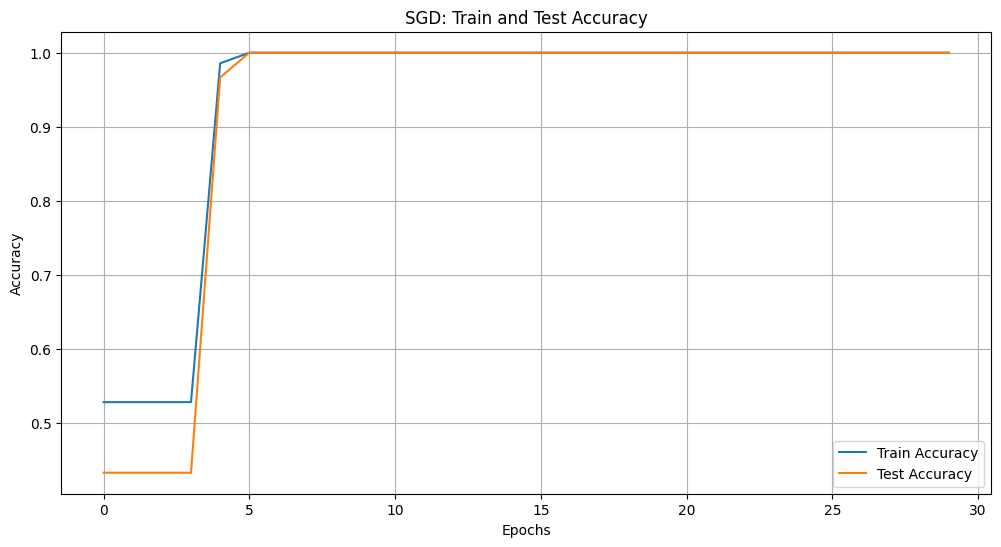

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X, y = iris.data[:100], iris.target[:100]  # Limit to 100 samples for simplicity

# Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert to PyTorch tensors
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.3, random_state=42)

# Define a simple neural network model with 1 hidden layer
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.layer1 = nn.Linear(4, 2)
        self.layer2 = nn.Linear(2, 2)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = self.layer2(x)
        return x

# Function to train and evaluate the model using SGD
def train_and_evaluate_sgd(learning_rate):
    model = SimpleNN()
    criterion = nn.CrossEntropyLoss()

    train_accuracies = []
    test_accuracies = []

    n_epochs = 30
    for epoch in range(n_epochs):
        model.train()
        for i in range(X_train.shape[0]):
            X_batch = X_train[i].unsqueeze(0)  # Stochastic (one sample at a time)
            y_batch = y_train[i].unsqueeze(0)

            model.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()

            # SGD update rule
            with torch.no_grad():
                for param in model.parameters():
                    param -= learning_rate * param.grad

        # Evaluate on the training set
        model.eval()
        train_correct = 0
        with torch.no_grad():
            outputs = model(X_train)
            _, predicted = torch.max(outputs, 1)
            train_correct += (predicted == y_train).sum().item()
        train_acc = train_correct / len(y_train)
        train_accuracies.append(train_acc)

        # Evaluate on the test set
        test_correct = 0
        with torch.no_grad():
            outputs = model(X_test)
            _, predicted = torch.max(outputs, 1)
            test_correct += (predicted == y_test).sum().item()
        test_acc = test_correct / len(y_test)
        test_accuracies.append(test_acc)

    return train_accuracies, test_accuracies

# Set learning rate
learning_rate = 0.01

# Train and evaluate using SGD
train_acc, test_acc = train_and_evaluate_sgd(learning_rate)

# Plotting the results
plt.figure(figsize=(12, 6))

plt.plot(range(30), train_acc, label='Train Accuracy')
plt.plot(range(30), test_acc, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('SGD: Train and Test Accuracy')
plt.legend()
plt.grid(True)

plt.show()
